## VAE Hawkes Process Estimation - Tutorial

### Preprocessing

In [45]:
import os
import sys

import numpy as np
import pandas as pd
import Hawkes as hk
from matplotlib import pyplot as plt

from PREPROCESSING.hawkes import hawkes_simulation, hawkes_estimation
from PREPROCESSING.generation import data_generation
from PREPROCESSING.discretisation import discretise
import VARIABLES.variables as var

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
params, alpha, beta, mu = data_generation()

In [ ]:
# Générer des données aléatoires
number_of_tests = 100
horizon = 10
test_alpha = np.random.uniform(0.5, 1, number_of_tests)
test_beta = np.random.uniform(0, 1, number_of_tests)
test_mu = np.random.uniform(0, 0.1, number_of_tests)


# Simuler les processus de Hawkes
raw_test_processes = []
for k in range(var.TRAINING_PROCESS):
    hawkes_process, T = hawkes_simulation(kernel='exp', 
                                          baseline='const', 
                                          params={"mu": mu, "alpha": alpha, "beta": beta}, 
                                          interval=[0, var.TIME_HORIZON])
    raw_test_processes.append(hawkes_process)

# Discrétiser les processus de Hawkes
test_processes_data = discretise(raw_test_processes, var.DISCRETISE_STEP, horizon=horizon)
test_processes_df = pd.DataFrame(test_processes_data)

# Écrire les données dans un fichier CSV
test_params = np.column_stack((test_alpha, test_beta, test_mu))
params_df = pd.DataFrame(test_params, columns=["alpha", "beta", "mu"])
params_df.to_csv("test_parameters.csv", index=False)

test_processes_df.to_csv("test_processes.csv", header=False, index=False)


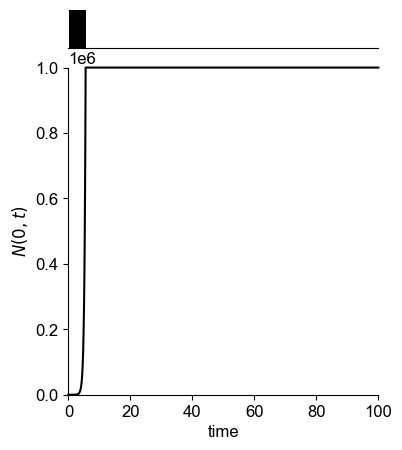

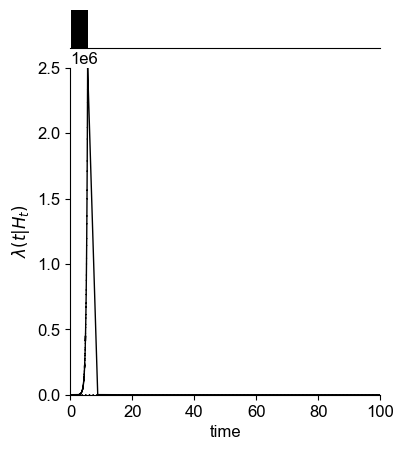

In [19]:
hawkes_process, T = hawkes_simulation(kernel='exp', 
                                      baseline='const', 
                                      params={"mu": mu, "alpha": alpha, "beta": beta}, 
                                      interval=[0, var.TIME_HORIZON])

In [ ]:
n = len(process)
cts_x = np.arange(0, (xlim*100000)/100000 + 1e-5, 1e-5)
cts_y = intensity(cts_x, params, process)

ylim = np.ceil(np.max(cts_y))

jumps_idx = np.where(np.concatenate(([0], np.diff(np.floor(process / 1e-5)) > 0, [0])) == 1)[0]
before_jumps_idx = jumps_idx - 1

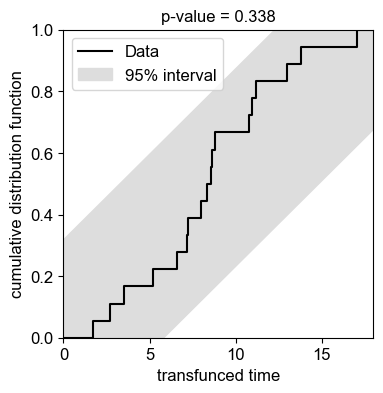

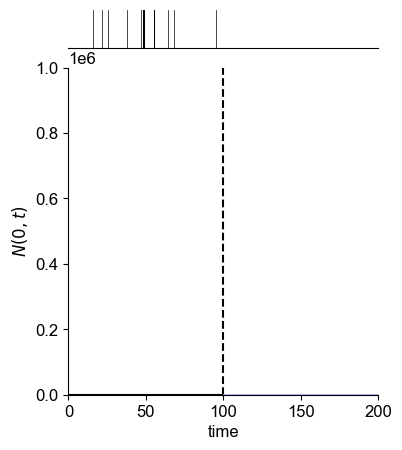

In [58]:
T_pred, metrics, T_transform, interval_transform = hawkes_estimation(T)